In [1]:
import tensorflow as tf
import numpy as np
import keras
from keras import regularizers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from sklearn.model_selection import train_test_split

import pickle
import time
import matplotlib.pyplot as plt

from tensorflow.keras.callbacks import TensorBoard
import os

#must for gpu
os.environ["CUDA_VISIBLE_DEVICES"] = '0' #use GPU with ID=0
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5 # maximun alloc gpu50% of MEM
config.gpu_options.allow_growth = True #allocate dynamically
sess = tf.Session(config = config)

NAME="Nepali-cnn-model1-{}".format(int(time.time()))
tensorboard= TensorBoard(log_dir='logs/{}'.format(NAME),write_images=True)



X=pickle.load(open("X_nepali.pickle","rb"))
y=pickle.load(open("y_nepali.pickle","rb"))
print(X.shape)



D:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(25824, 36, 36, 1)


In [2]:
 #normalization already done
print(X.shape[1:])
#X=np.array(X)
#X_final=X.reshape(20,20)

# one-hot encoding using keras' numpy-related utilities
n_classes=58
print("Shape before one-hot encoding: ", y.shape)
Y = keras.utils.to_categorical(y, n_classes)
#Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y.shape)

X_train,X_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.25)


(36, 36, 1)
Shape before one-hot encoding:  (25824,)
Shape after one-hot encoding:  (25824, 58)


In [3]:
## to FIND THE BEST COMBINATION
# dense_layers=[1,2]
# layer_sizes=[64,128,164]
# conv_layers=[2,3,4]

# for dense_layer in dense_layers:
#     for layer_size in layer_sizes:
#         for conv_layer in conv_layers:
#             NAME_1="{}-conv-{}-nodes-{}-dense-{}".format(conv_layer,layer_size,dense_layer,int(time.time()))
#             print(NAME_1)
#             model= Sequential()
#             #64 denotes the number of filters and (3,3) denotes the window size
#             model.add(Conv2D(layer_size,(3,3),input_shape=X.shape[1:]))
#             model.add(Activation('relu'))
#             model.add(MaxPooling2D(pool_size=(2,2)))
            
#             # -1 because we have already added a defaul conv layer and input_shape should always be present at first
#             for l in range(conv_layer-1):
#                 model.add(Conv2D(layer_size,(3,3)))
#                 model.add(Activation('relu'))
#                 model.add(MaxPooling2D(pool_size=(2,2)))

#             model.add(Flatten())
#             for l in range(dense_layer-1):
#                 model.add(Dense(layer_size, activation='relu',kernel_regularizer=regularizers.l2(0.003)))
 
                
                
#             model.add(Dense(58))
#             model.add(Activation('softmax'))
            
            
#             model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])
            
#             history=model.fit(X,Y,batch_size=30,validation_split=0.2,epochs=15, callbacks=[tensorboard])
#             print(history)


            
            
            
# # define the grid search parameters
# optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
# param_grid = dict(optimizer=optimizer)
# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
# grid_result = grid.fit(X, Y)
# # summarize results
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# means = grid_result.cv_results_['mean_test_score']
# stds = grid_result.cv_results_['std_test_score']
# params = grid_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#     print("%f (%f) with: %r" % (mean, stdev, param))

layer_size=168

model= Sequential()
#64 denotes the number of filters and (3,3) denotes the window size
model.add(Conv2D(layer_size,(3,3),input_shape=X_test.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(layer_size,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(layer_size, activation='relu',kernel_regularizer=regularizers.l2(0.003)))
model.add(Dropout(0.15))


model.add(Dense(58))
model.add(Activation('softmax'))


In [4]:
model.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])


In [5]:
history=model.fit(X_train,y_train,batch_size=32,epochs=20,callbacks=[tensorboard])
score = model.evaluate(X_test, y_test, batch_size= 32 ,verbose=1)


Epoch 1/20
19368/19368 [==============================] - 18s 952us/step - loss: 1.5442 - acc: 0.6632
Epoch 2/20
19368/19368 [==============================] - 16s 832us/step - loss: 0.7375 - acc: 0.8634
Epoch 3/20
19368/19368 [==============================] - 16s 852us/step - loss: 0.6160 - acc: 0.8970
Epoch 4/20
19368/19368 [==============================] - 16s 833us/step - loss: 0.5325 - acc: 0.9197
Epoch 5/20
19368/19368 [==============================] - 16s 837us/step - loss: 0.4969 - acc: 0.9268
Epoch 6/20
19368/19368 [==============================] - 16s 839us/step - loss: 0.4486 - acc: 0.9405
Epoch 7/20
19368/19368 [==============================] - 16s 839us/step - loss: 0.4379 - acc: 0.9418
Epoch 8/20
19368/19368 [==============================] - 16s 841us/step - loss: 0.4135 - acc: 0.9465
Epoch 9/20
19368/19368 [==============================] - 16s 840us/step - loss: 0.4104 - acc: 0.9501
Epoch 10/20
19368/19368 [==============================] - 16s 843us/step - loss: 

The value of test loss and test accuracy are [0.3766670416131191, 0.9623605948693986]
Saved trained model at D:/ML/nepali_cnn_model\cnn_stratified.h5 


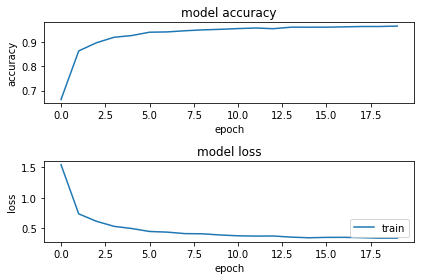

In [8]:
print("The value of test loss and test accuracy are",score)

# saving the model
save_dir = "D:/ML/nepali_cnn_model"
model_name = 'cnn_stratified.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
#plt.plot(score.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
#plt.plot(score.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig
plt.legend(['train', 'test'], loc='lower right')


In [16]:
print(X.shape)

(25824, 36, 36, 1)


In [7]:
print(X[1])

[[[1.        ]
  [1.        ]
  [0.99607843]
  ...
  [1.        ]
  [1.        ]
  [0.98823529]]

 [[1.        ]
  [1.        ]
  [0.99607843]
  ...
  [1.        ]
  [1.        ]
  [0.97647059]]

 [[1.        ]
  [1.        ]
  [0.99607843]
  ...
  [1.        ]
  [0.99607843]
  [0.98823529]]

 ...

 [[0.90588235]
  [1.        ]
  [0.97647059]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[0.99215686]
  [0.95294118]
  [0.99607843]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]

 [[0.96862745]
  [0.96470588]
  [1.        ]
  ...
  [1.        ]
  [1.        ]
  [1.        ]]]


In [8]:
temp=np.array(X[1]).reshape(-1,36,36,1)

In [9]:
print(temp) 

[[[[1.        ]
   [1.        ]
   [0.99607843]
   ...
   [1.        ]
   [1.        ]
   [0.98823529]]

  [[1.        ]
   [1.        ]
   [0.99607843]
   ...
   [1.        ]
   [1.        ]
   [0.97647059]]

  [[1.        ]
   [1.        ]
   [0.99607843]
   ...
   [1.        ]
   [0.99607843]
   [0.98823529]]

  ...

  [[0.90588235]
   [1.        ]
   [0.97647059]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[0.99215686]
   [0.95294118]
   [0.99607843]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]

  [[0.96862745]
   [0.96470588]
   [1.        ]
   ...
   [1.        ]
   [1.        ]
   [1.        ]]]]
